#Problem 1
#In this part, I use csvstat to observe these contents of the csv file. There are 27 columns in it, and 12 of them have null values. More specific, the meaning of part of columns are: 
FACILITY_NAME means name of facility where the inspection occurred.
FACILITY_KEY means the unique key of the facility where the inspection occurred
SITE_ADDRESS means Street address of the facility where the inspection occurred
CITY means city of the facility where the inspection occurred
STATE means state of the facility where the inspection occurred
ZIP means zip of the facility where the inspection occurred
OWNER_NAME name of the owner of the facility where the inspection occurred at the inspection.
NATURE_OF_BUSINESS the type of business
STREET_NUMBER Stree number of the facility
STREET_NAME Stree name of the facility
STREET_TYPE Stree type of the facility
POST_DIRECTIONAL postal direction of the facility 
PHONE phone number of the facility
INSPECTION_DESC description of the violation that was found.
For these columns, I'm most interested in information about time and inspections. Some questions in my mind, for instance, did every inspection perform successfully? And, which kind of actions always occur? 

In [1]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [2]:
!createdb -U dbuser exercise4

In [3]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [4]:
%sql postgresql://dbuser@localhost:5432/exercise4

'Connected: dbuser@exercise4'

In [5]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 14:22:26--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 14:22:26 (43.8 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



In [6]:
!wc -l abq-food-inspections-fy2010.csv

17557 abq-food-inspections-fy2010.csv


In [7]:
!csvcut -n abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


In [8]:
!wc -l abq-food-inspections-fy2010.csv

17557 abq-food-inspections-fy2010.csv


In [9]:
!shuf -n 17557 abq-food-inspections-fy2010.csv | csvstat

  1. EL MEZQUITE MARKET LLC
	<class 'str'>
	Nulls: False
	Unique values: 2616
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. 60817
	<class 'str'>
	Nulls: False
	Unique values: 2836
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
	Max length: 12
  3. 201 SAN PEDRO DR SE 
	<class 'str'>
	Nulls: True
	Unique values: 2457
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. ALBUQUERQUE
	<class 'str'>
	Nulls: False
	Values: CITY, ALBUQUERQUE
  5. NM
	<class 'str'>
	Nulls: False
	Values: NM, STATE, 87
  6. 87108
	<class 'str'>
	Nulls: False
	Unique values: 49
	5 most frequent values:
		87110:	1996
		87108:	1975
		87102:	1601
		87106:	1568
		87109:	1552
	Max length:

In [10]:
!head -n 3 abq-food-inspections-fy2010.csv | csvlook

|----------------------+--------------+-------------------------------+-------------+-------+-------+-----------+---------------------+--------------------+---------------+-------------+-------------+------------------+------------+------------------+------------------------------+---------------------+-----------------+-------------------------+------------+-------------+-------------+-------------+----------------+----------------+----------------------------------+------------------|
|  FACILITY_NAME       | FACILITY_KEY | SITE_ADDRESS                  | CITY        | STATE | ZIP   | OWNER_KEY | OWNER_NAME          | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | STREET_TYPE | POST_DIRECTIONAL | PHONE      | PROGRAM_CATEGORY | PROGRAM_CATEGORY_DESCRIPTION | INSPECTION_DATE     | INSPECTION_TYPE | INSPECTION_DESC         | SERIAL_NUM | ACTION_CODE | ACTION_DESC | RESULT_CODE | RESULT_DESC    | VIOLATION_CODE | VIOLATION_DESC                   | INSPECTION_MEMO  |
|---------------

#Problem 2

#In this part, I create and connect to a new database, define a database table in it, load this dataset into it. I used some queries mentioned in the class, which seems not very hard, but when I tried to do these work by myself, I don't feel very good!

In [11]:
%%sql
DROP TABLE IF EXISTS inspections;
CREATE TABLE inspections (
   facility_name VARCHAR(202),
   facility_key INTEGER,
   site_address VARCHAR(102),
   city VARCHAR(52),
   state CHAR(6),
   zip CHAR(22),
   owner_key INTEGER,
   owner_name VARCHAR(202),
   nature_of_business VARCHAR(25),  
   street_number VARCHAR(16), 
   street_name VARCHAR(52),
   street_type VARCHAR(10),
   post_directional CHAR(6),
   phone CHAR(42),
   program_category CHAR(10),
   program_category_des VARCHAR(64),
   inspection_date TIMESTAMP,
   inspection_type CHAR(64),
   inspection_desc VARCHAR(102), 
   serial_num VARCHAR(20), 
   action_code CHAR(64),
   action_desc VARCHAR(102),
   result_code VARCHAR(64),
   result_desc VARCHAR(102),
   violation_code VARCHAR(14),
   violation_desc VARCHAR(202),
   inspection_memo VARCHAR(502)
)

Done.
Done.


[]

In [12]:
!pwd

/home/jovyan/work


In [13]:
%%sql
COPY inspections FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [14]:
%%sql
SELECT COUNT(*) FROM inspections;

1 rows affected.


[(17556,)]

#Problem 3
In this part, I try to explore those data, and ask some questions for myself, then try to answer them.


#Problem 3.a
According to what I learned from ECON class, on very monday of a week, or every first month of a year, every industries will have less daily actions. Thus, I want to know how many inspections will be performed on monday.
First, I creat a new table from metadata, then I detail the "time column" into more specific columns. Finally, I get how monday will has inspections.


In [15]:
%%sql
SELECT TO_CHAR(inspections.inspection_date, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(inspections.inspection_date, 'YYYY') AS year,
    TO_CHAR(inspections.inspection_date, 'MM') AS month,
    TO_CHAR(inspections.inspection_date, 'DD') AS day,
    TO_CHAR(inspections.inspection_date, 'Day') AS day_of_week_str,
    TO_CHAR(inspections.inspection_date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspections.inspection_date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspections.inspection_date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS is_weekday,
    TO_CHAR(inspections.inspection_date, 'HH24') AS hour_24,
    TO_CHAR(inspections.inspection_date, 'Q') AS quarter
FROM inspections


17556 rows affected.


[('2009-10-21', '2009', '10', '21', 'Wednesday', '4', 0, 1, '00', '4'),
 ('2009-10-21', '2009', '10', '21', 'Wednesday', '4', 0, 1, '00', '4'),
 ('2009-10-21', '2009', '10', '21', 'Wednesday', '4', 0, 1, '00', '4'),
 ('2010-04-14', '2010', '04', '14', 'Wednesday', '4', 0, 1, '00', '2'),
 ('2010-04-14', '2010', '04', '14', 'Wednesday', '4', 0, 1, '00', '2'),
 ('2010-03-23', '2010', '03', '23', 'Tuesday  ', '3', 0, 1, '00', '1'),
 ('2010-03-23', '2010', '03', '23', 'Tuesday  ', '3', 0, 1, '00', '1'),
 ('2010-03-23', '2010', '03', '23', 'Tuesday  ', '3', 0, 1, '00', '1'),
 ('2009-12-15', '2009', '12', '15', 'Tuesday  ', '3', 0, 1, '00', '4'),
 ('2009-12-15', '2009', '12', '15', 'Tuesday  ', '3', 0, 1, '00', '4'),
 ('2009-12-15', '2009', '12', '15', 'Tuesday  ', '3', 0, 1, '00', '4'),
 ('2010-05-03', '2010', '05', '03', 'Monday   ', '2', 0, 1, '00', '2'),
 ('2010-05-03', '2010', '05', '03', 'Monday   ', '2', 0, 1, '00', '2'),
 ('2010-03-19', '2010', '03', '19', 'Friday   ', '6', 1, 0, '00', '1'),
 ('2010-06-01', '2010', '06', '01', 'Tuesday  ', '3', 0, 1, '00', '2'),
 ('2010-06-01', '2010', '06', '01', 'Tuesday  ', '3', 0, 1, '00', '2'),
 ('2009-11-06', '2009', '11', '06', 'Friday   ', '6', 1, 0, '00', '4'),
 ('2009-11-06', '2009', '11', '06', 'Friday   ', '6', 1, 0, '00', '4'),
 ('2009-11-06', '2009', '11', '06', 'Friday   ', '6', 1, 0, '00', '4'),
 ('2009-09-14', '2009', '09', '14', 'Monday   ', '2', 0, 1, '00', '3'),
 ('2009-09-14', '2009', '09', '14', 'Monday   ', '2', 0, 1, '00', '3'),
 ('2009-09-14', '2009', '09', '14', 'Monday   ', '2', 0, 1, '00', '3'),
 ('2010-02-02', '2010', '02', '02', 'Tuesday  ', '3', 0, 1, '00', '1'),
 ('2010-02-02', '2010', '02', '02', 'Tuesday  ', '3', 0, 1, '00', '1'),
 ('2009-08-19', '2009', '08', '19', 'Wednesday', '4', 0, 1, '00', '3'),
 ('2009-08-19', '2009', '08', '19', 'Wednesday', '4', 0, 1, '00', '3'),
 ('2010-04-01', '2010', '04', '01', 'Thursday ', '5', 0, 1, '00', '2'),
 ('2010-04-01', '2010', '04', '01', 'Thursday ', '5', 0, 1, '00', '2'),
 ('2009-08-21', '2009', '08', '21', 'Friday   ', '6', 1, 0, '00', '3'),
 ('2009-08-21', '2009', '08', '21', 'Friday   ', '6', 1, 0, '00', '3'),
 ('2009-09-11', '2009', '09', '11', 'Friday   ', '6', 1, 0, '00', '3'),
 ('2010-03-19', '2010', '03', '19', 'Friday   ', '6', 1, 0, '00', '1'),
 ('2010-03-19', '2010', '03', '19', 'Friday   ', '6', 1, 0, '00', '1'),
 ('2010-03-19', '2010', '03', '19', 'Friday   ', '6', 1, 0, '00', '1'),
 ('2010-03-19', '2010', '03', '19', 'Friday   ', '6', 1, 0, '00', '1'),
 ('2009-07-27', '2009', '07', '27', 'Monday   ', '2', 0, 1, '00', '3'),
 ('2009-07-27', '2009', '07', '27', 'Monday   ', '2', 0, 1, '00', '3'),
 ('2009-12-16', '2009', '12', '16', 'Wednesday', '4', 0, 1, '00', '4'),
 ('2009-12-16', '2009', '12', '16', 'Wednesday', '4', 0, 1, '00', '4'),
 ('2009-12-16', '2009', '12', '16', 'Wednesday', '4', 0, 1, '00', '4'),
 ('2009-09-22', '2009', '09', '22', 'Tuesday  ', '3', 0, 1, '00', '3'),
 ('2009-09-22', '2009', '09', '22', 'Tuesday  ', '3', 0, 1, '00', '3'),
 ('2009-09-22', '2009', '09', '22', 'Tuesday  ', '3', 0, 1, '00', '3'),
 ('2010-03-09', '2010', '03', '09', 'Tuesday  ', '3', 0, 1, '00', '1'),
 ('2010-03-09', '2010', '03', '09', 'Tuesday  ', '3', 0, 1, '00', '1'),
 ('2009-08-27', '2009', '08', '27', 'Thursday ', '5', 0, 1, '00', '3'),
 ('2009-08-27', '2009', '08', '27', 'Thursday ', '5', 0, 1, '00', '3'),
 ('2009-08-27', '2009', '08', '27', 'Thursday ', '5', 0, 1, '00', '3'),
 ('2010-02-19', '2010', '02', '19', 'Friday   ', '6', 1, 0, '00', '1'),
 ('2010-02-19', '2010', '02', '19', 'Friday   ', '6', 1, 0, '00', '1'),
 ('2009-08-11', '2009', '08', '11', 'Tuesday  ', '3', 0, 1, '00', '3'),
 ('2009-08-11', '2009', '08', '11', 'Tuesday  ', '3', 0, 1, '00', '3'),
 ('2010-01-20', '2010', '01', '20', 'Wednesday', '4', 0, 1, '00', '1'),
 ('2010-01-20', '2010', '01', '20', 'Wednesday', '4', 0, 1, '00', '1'),
 ('2010-01-20', '2010', '01', '20', 'Wednesday', '4', 0, 1, '00', '1'),
 ('2009-12-30', '2009', '12', '30', 'Wed

In [16]:
%%sql
DROP TABLE IF EXISTS days;
CREATE TABLE days (
    id SERIAL,
    day_of_year CHAR(10),
    year INTEGER,
    month INTEGER,
    day INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_24 INTEGER,
    quarter INTEGER
);

Done.
Done.


[]

In [17]:
%%sql
INSERT INTO days (day_of_year, year, month, day, day_of_week_str, day_of_week,
                  is_weekend, is_weekday, hour_24, quarter)
SELECT DISTINCT TO_CHAR(inspections.inspection_date, 'YYYY-MM-DD') AS day_of_year, 
    CAST(TO_CHAR(inspections.inspection_date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(inspections.inspection_date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR(inspections.inspection_date, 'DD') AS INTEGER) AS day,
    TO_CHAR(inspections.inspection_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(inspections.inspection_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspections.inspection_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspections.inspection_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(inspections.inspection_date, 'HH24') AS INTEGER) AS hour_24,
    CAST(TO_CHAR(inspections.inspection_date, 'Q') AS INTEGER) AS quarter
FROM inspections;


258 rows affected.


[]

In [18]:
%%sql
SELECT COUNT(*)
FROM(
      SELECT day_of_week_str
      FROM days
      WHERE day_of_week_str = 'Monday') AS d;

1 rows affected.


[(48,)]

#problem 3.b

In this part, I decide to information about inspections. Action_code means the type of action, and "00" or "NON-GRADED" means that inspector was unable perform an inspection. Thus, I want to explore that did every inspection perform successfully? And which kind of actions always occur?  
First, I creat a new table named inspections, which include owner_key, action_code,	result_code, violation_code, violation_desc.
Then I count occurance of every action, and plot it. Finally, I found action11 always occur. Action00 occur approximately 15.95%(the occurance of action00 is 2800, the total affected row is 17556, I use 2800/17556 to get the percentage of action00). Which means there is 15.95% that inpsector was unable perform an inspection. 

In [19]:
%%sql
DROP TABLE IF EXISTS violations;
CREATE TABLE violations (
    id SERIAL,
    owner_key INTEGER,
    action_code CHAR(64),
    result_code VARCHAR(64),
    violation_code VARCHAR(14),
    violation_desc VARCHAR(202)
);

Done.
Done.


[]

In [20]:
%%sql
INSERT INTO violations (owner_key, action_code, result_code, violation_code, violation_desc)
SELECT owner_key, action_code, result_code, violation_code, violation_desc FROM inspections


17556 rows affected.


[]

In [21]:
%%sql
SELECT*
FROM violations 
LIMIT 5;

5 rows affected.


[(1, 47341, '00                                                              ', '00', '    68    ', 'Delivered Informational Brochure'),
 (2, 47341, '11                                                              ', '03', '    00    ', 'No Violations Found'),
 (3, 47341, '11                                                              ', '03', '    55    ', 'Additional Comments'),
 (4, 47341, '11                                                              ', '03', '    00    ', 'No Violations Found'),
 (5, 47341, '11                                                              ', '03', '    55    ', 'Additional Comments')]

In [22]:
%%sql
SELECT action_code, COUNT(action_code)
FROM   violations
GROUP BY action_code
ORDER BY COUNT(action_code) DESC
LIMIT 8;

8 rows affected.


[('11                                                              ', 14080),
 ('00                                                              ', 2800),
 ('09                                                              ', 382),
 ('06                                                              ', 264),
 ('10                                                              ', 21),
 ('17                                                              ', 5),
 ('12                                                              ', 3),
 ('03                                                              ', 1)]

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 8 artists>

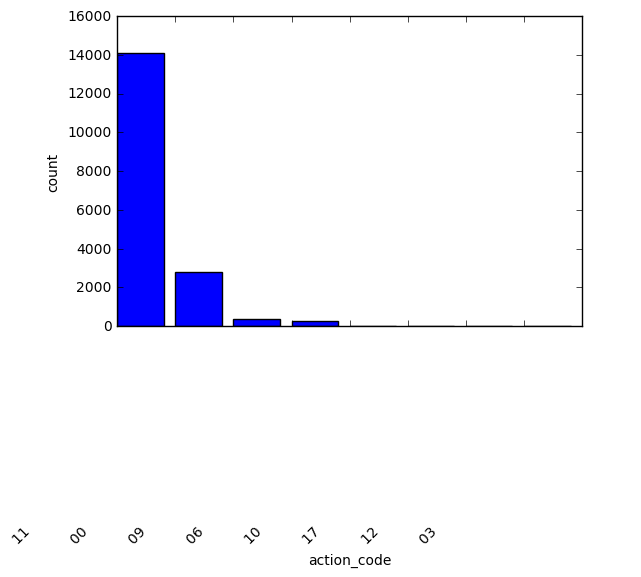

In [23]:
%matplotlib inline
result = _
result.bar()

#Problem 3.c
In this part, I want to know how many columns include Delivered Informational Brochure, No Violations Found, Additional Comments these three type of inspection describetions.

In [24]:
%%sql
SELECT owner_key, violation_desc
FROM violations
WHERE violation_desc IN ('Delivered Informational Brochure', 'No Violations Found', 'Additional Comments')

11444 rows affected.


[(47341, 'Delivered Informational Brochure'),
 (47341, 'No Violations Found'),
 (47341, 'Additional Comments'),
 (47341, 'No Violations Found'),
 (47341, 'Additional Comments'),
 (29294, 'Additional Comments'),
 (66644, 'Delivered Informational Brochure'),
 (66644, 'No Violations Found'),
 (66644, 'Additional Comments'),
 (66644, 'No Violations Found'),
 (66644, 'Additional Comments'),
 (82383, 'No Violations Found'),
 (82383, 'Additional Comments'),
 (6743, 'Delivered Informational Brochure'),
 (6743, 'No Violations Found'),
 (6743, 'Additional Comments'),
 (1838, 'Delivered Informational Brochure'),
 (1838, 'No Violations Found'),
 (1838, 'Additional Comments'),
 (1838, 'No Violations Found'),
 (1838, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'No Violations Found'),
 (19642, 'Additional Comments'),
 (19642, 'Delivered Informational Brochure'),
 (19642, 'Additional Comments'),
 (19642, 'Additional Comments'),
 (9504, 'Delivered Informational Brochure'),
 (9504, 'No Violations Found'),
 (9504, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (1272, 'No Violations Found'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (16883, 'Additional Comments'),
 (80866, 'No Violations